**importing data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from numpy import mean
df=pd.read_csv('/content/drive/MyDrive/files for prml/heart.csv')
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

**PREPROCESSING**

In [ ]:
df=df.dropna(axis=0)
df['Sex']=pd.factorize(df.Sex)[0] #preprocessing and feature extraction pipelines to different subsets of features
df['ChestPainType']=pd.factorize(df.ChestPainType)[0] #numeric data is standard-scaled after mean-imputation, while the categorical data is one-hot encoded
df['RestingECG']=pd.factorize(df.RestingECG)[0]
df['ExerciseAngina']=pd.factorize(df.ExerciseAngina)[0]
df['ST_Slope']=pd.factorize(df.ST_Slope)[0]
print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

**data visualization**

In [ ]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Sex,918.000000,0.210240,0.407701,0.000000,0.000000,0.000000,0.000000,1.000000
ChestPainType,918.000000,1.452070,0.851832,0.000000,1.000000,2.000000,2.000000,3.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG,918.000000,0.603486,0.805968,0.000000,0.000000,0.000000,1.000000,2.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


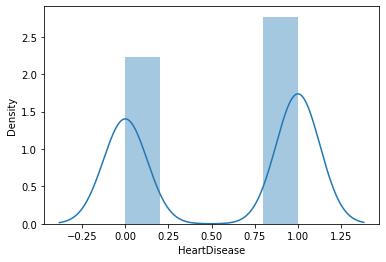

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['HeartDisease']);

In [ ]:
#kernel density estimation allows probability density estimation
def kde_plot(column, target) :
  if(column!=target): 
    fig, ax = plt.subplots(figsize = (10,7))
    sns.kdeplot(df[df[target]==1][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax) 
    sns.kdeplot(df[df[target]==0][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

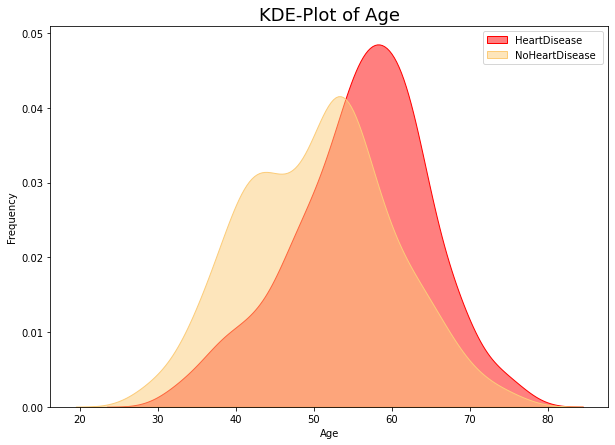

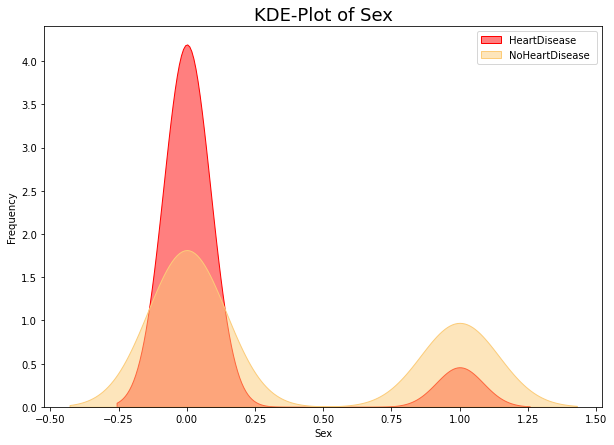

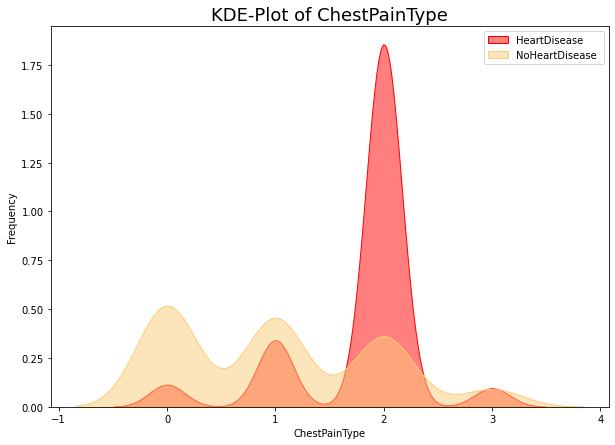

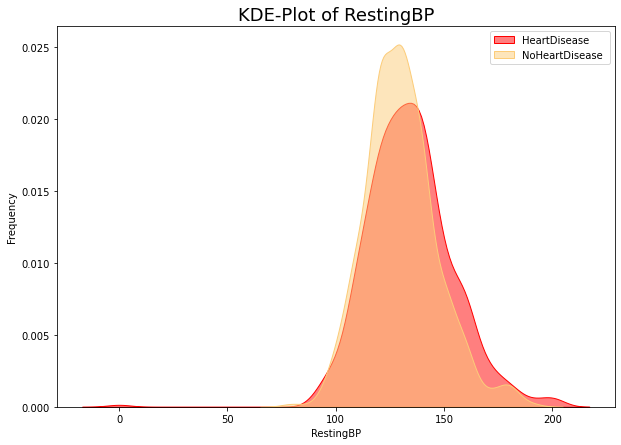

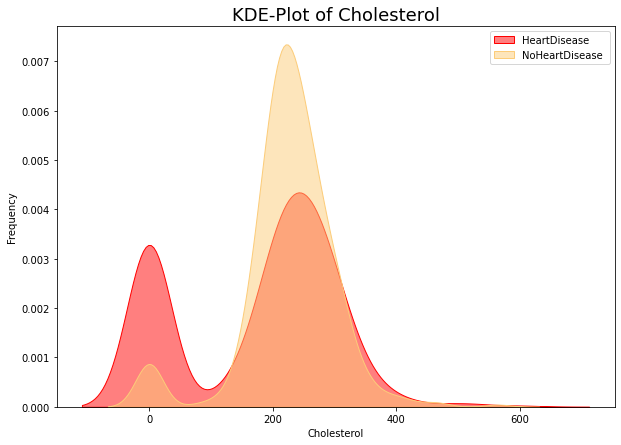

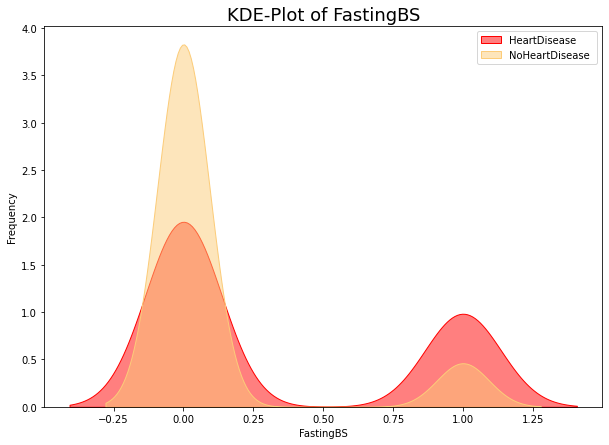

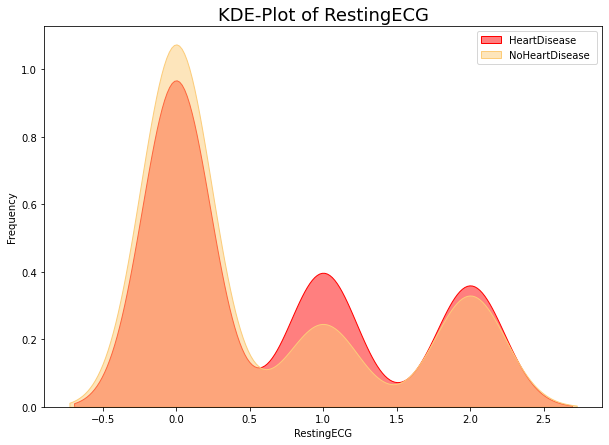

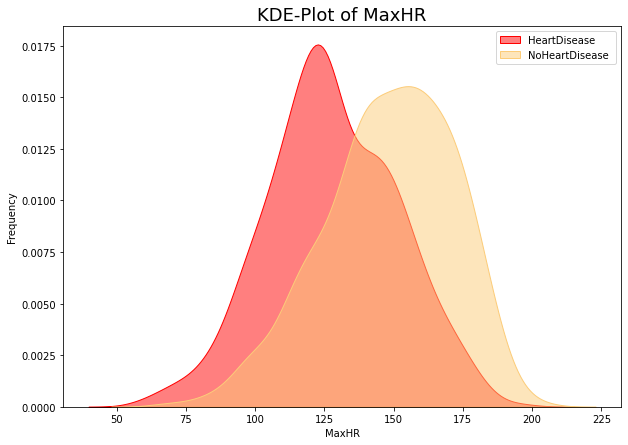

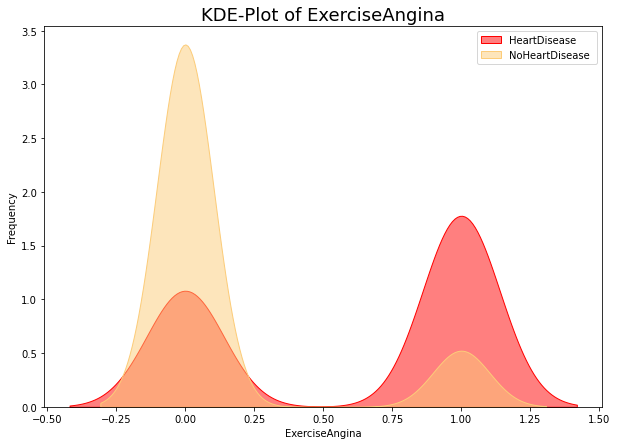

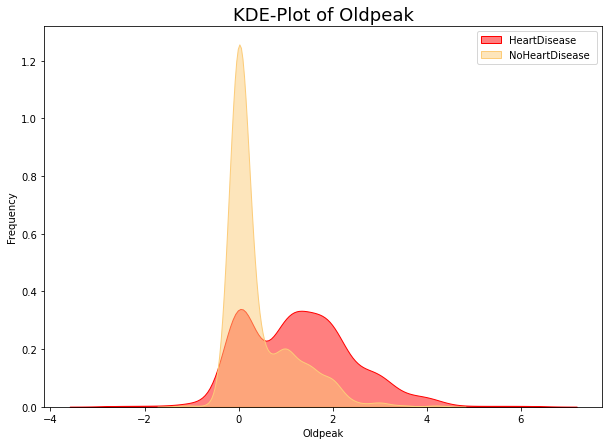

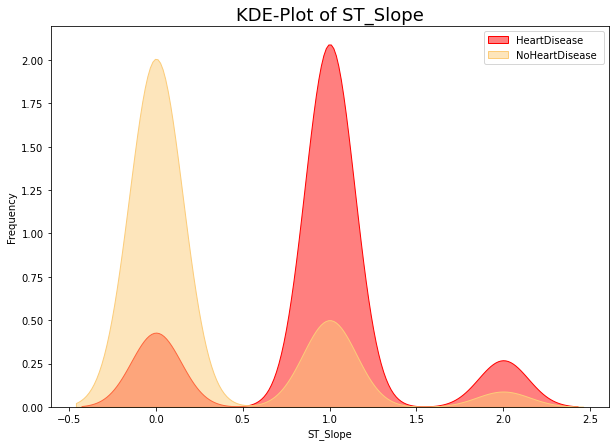

In [ ]:
columns=df.columns
for column in columns: 
    kde_plot(column, 'HeartDisease')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


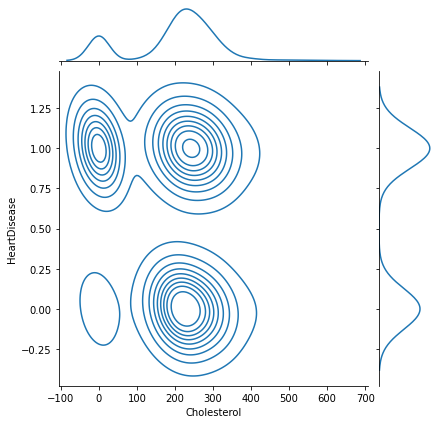

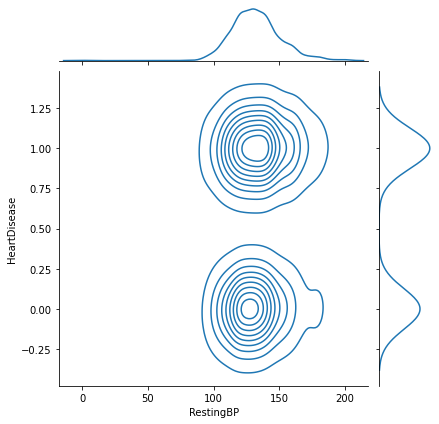

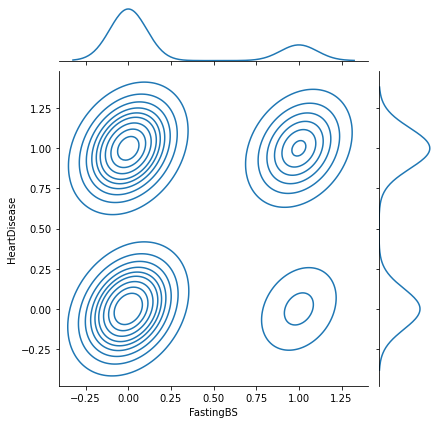

In [ ]:
sns.jointplot(df['Cholesterol'],df['HeartDisease'],kind='kde')
sns.jointplot(df['RestingBP'],df['HeartDisease'],kind='kde')
sns.jointplot(df['FastingBS'],df['HeartDisease'],kind='kde')

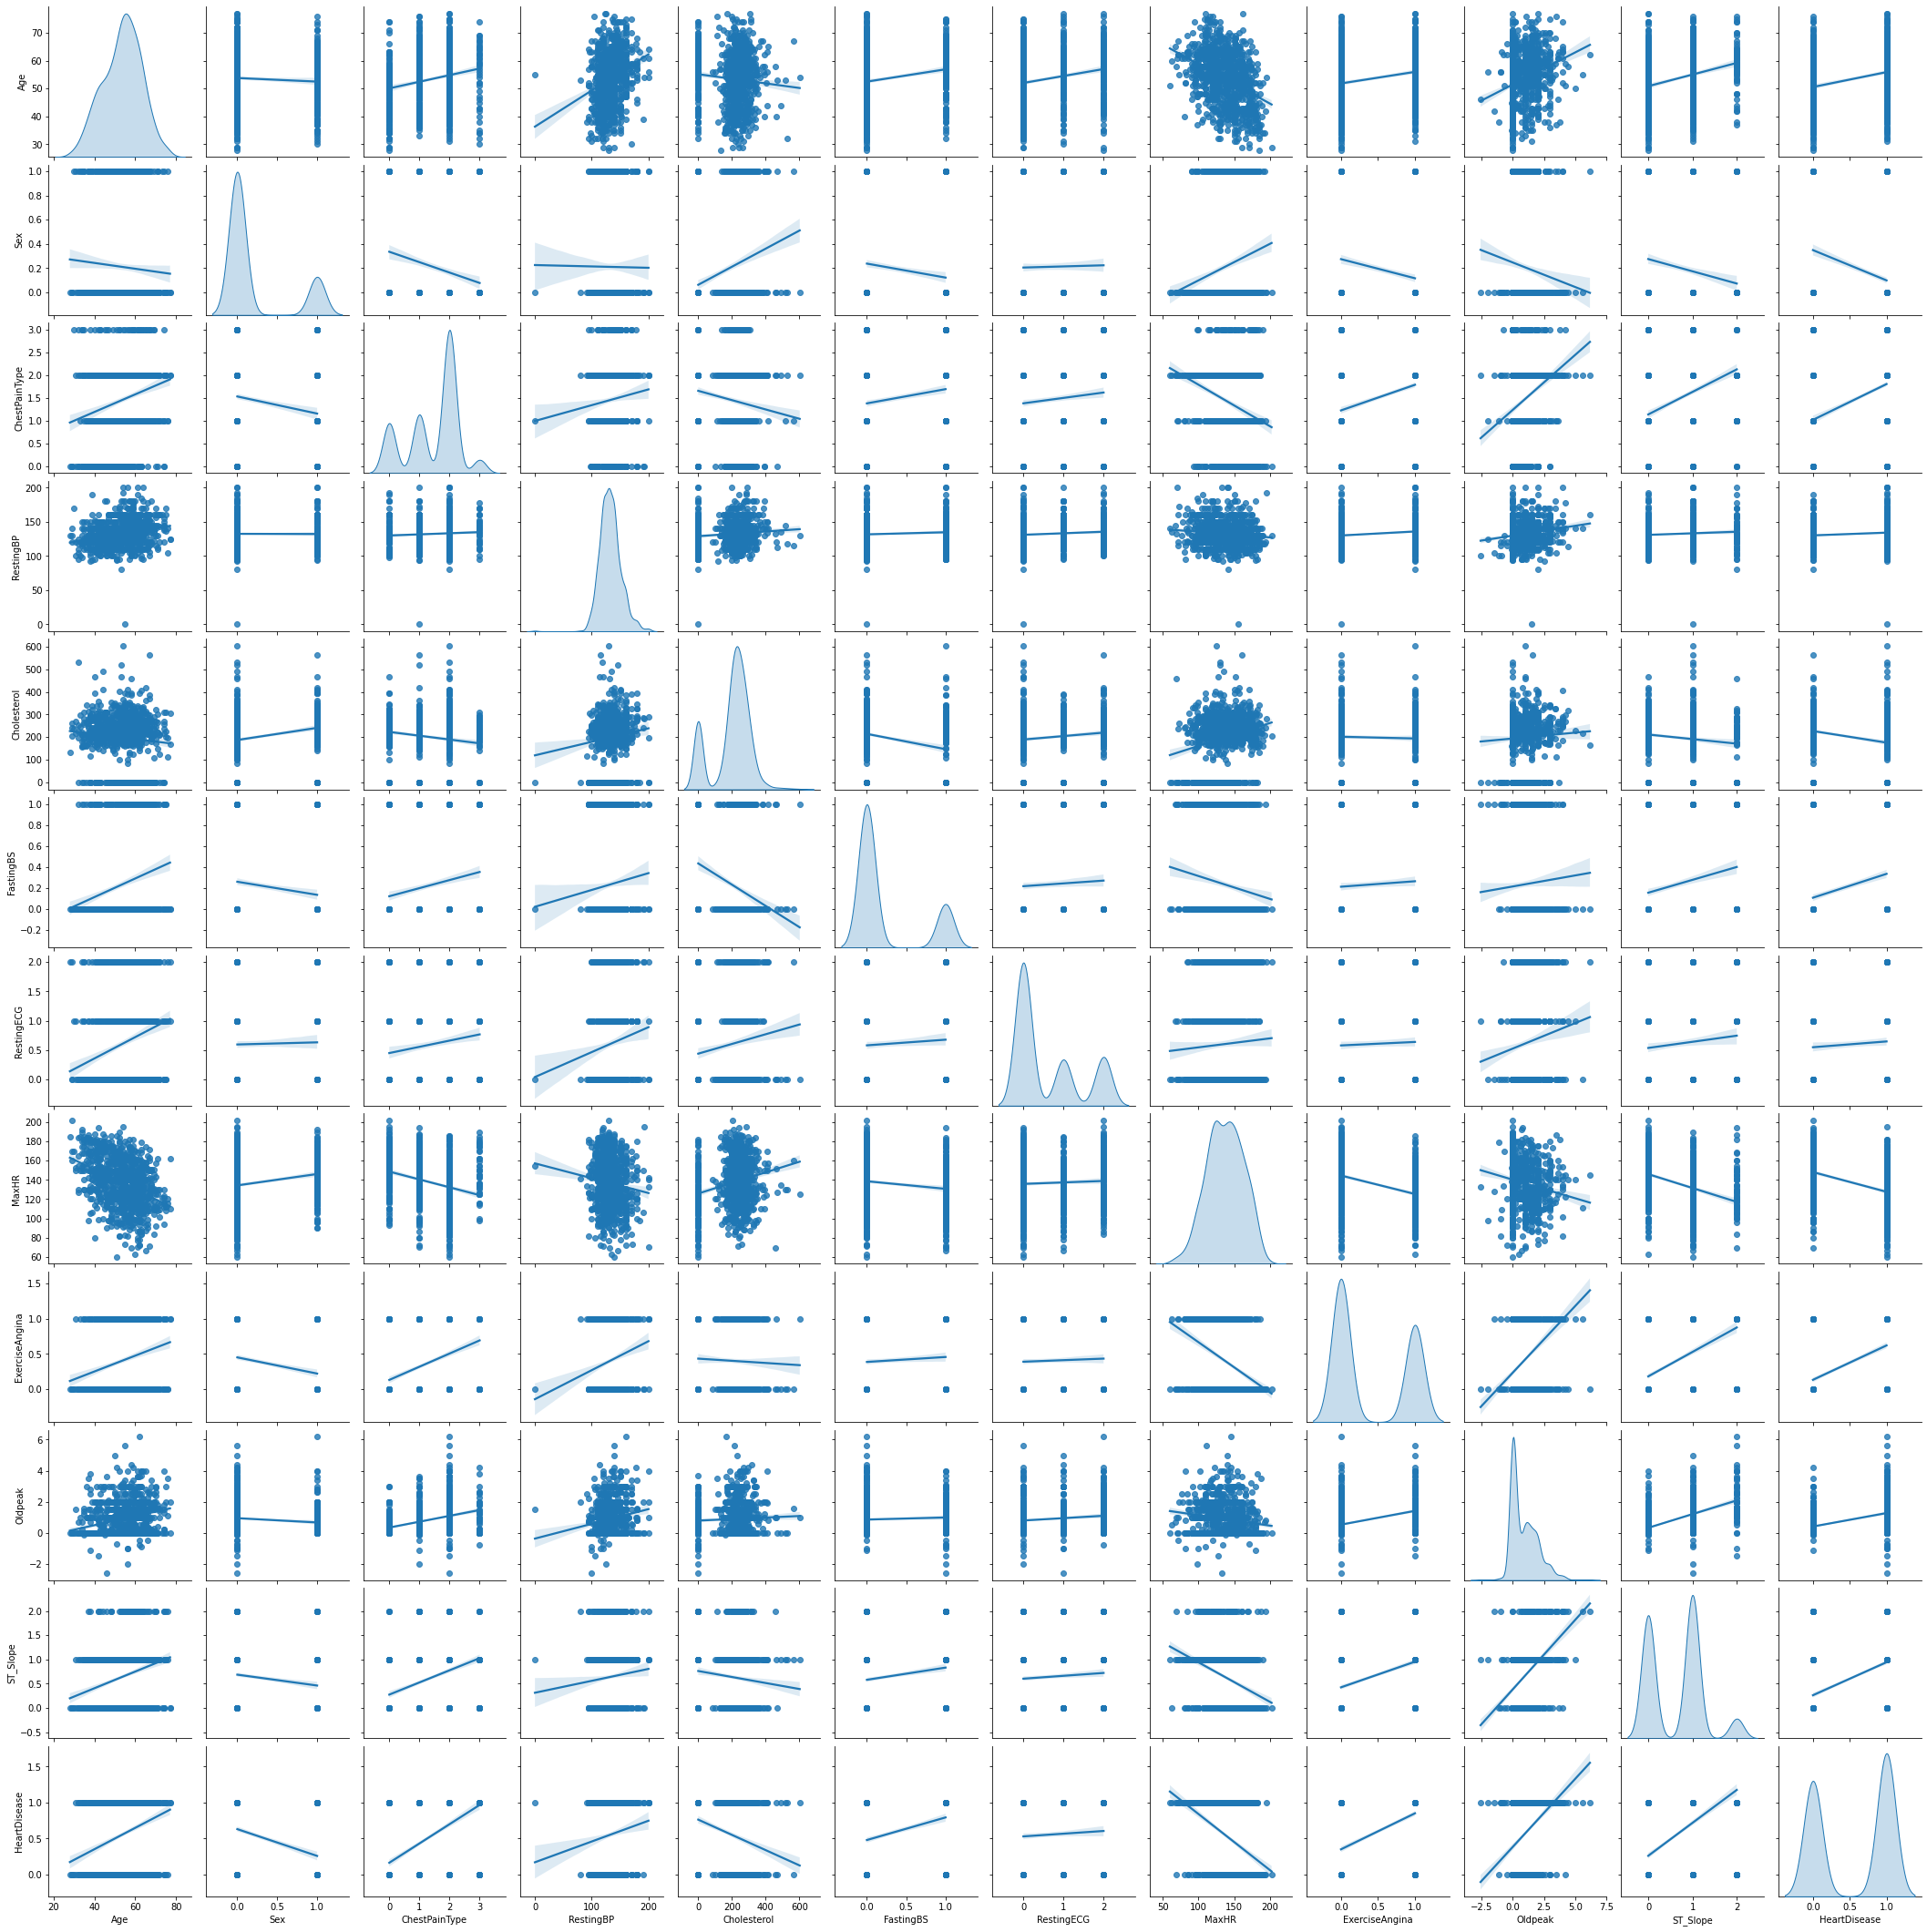

In [ ]:
data_set=df.copy()
#data_set.insert(0,'heart_disease',)
sns.pairplot(data_set, kind="reg", diag_kind="kde")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
scaler= MinMaxScaler()
scaler.fit(X)
data=scaler.transform(X)
data=pd.DataFrame(data)
print(data)

           0    1         2     3         4    5    6         7    8   \
0    0.244898  0.0  0.000000  0.70  0.479270  0.0  0.0  0.788732  0.0   
1    0.428571  1.0  0.333333  0.80  0.298507  0.0  0.0  0.676056  0.0   
2    0.183673  0.0  0.000000  0.65  0.469320  0.0  0.5  0.267606  0.0   
3    0.408163  1.0  0.666667  0.69  0.354892  0.0  0.0  0.338028  1.0   
4    0.530612  0.0  0.333333  0.75  0.323383  0.0  0.0  0.436620  0.0   
..        ...  ...       ...   ...       ...  ...  ...       ...  ...   
913  0.346939  0.0  1.000000  0.55  0.437811  0.0  0.0  0.507042  0.0   
914  0.816327  0.0  0.666667  0.72  0.320066  1.0  0.0  0.570423  0.0   
915  0.591837  0.0  0.666667  0.65  0.217247  0.0  0.0  0.387324  1.0   
916  0.591837  1.0  0.000000  0.65  0.391376  0.0  1.0  0.802817  0.0   
917  0.204082  0.0  0.333333  0.69  0.290216  0.0  0.0  0.795775  0.0   

           9    10  
0    0.295455  0.0  
1    0.409091  0.5  
2    0.295455  0.0  
3    0.465909  0.5  
4    0.295455  0.0

**train test split**

In [ ]:
from sklearn.model_selection  import train_test_split
Y = df['HeartDisease']
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(642, 11) (276, 11) (642,) (276,)


In [ ]:
X_train=X_train.values
Y_train=Y_train.values
X_test=X_test.values
Y_test=Y_test.values

**MODEL SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500).fit(X_train, Y_train)
s=clf.score(X_test,Y_test)
print(s)

0.855072463768116


**bagging classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bclf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, random_state=0)
bclf.fit(X_train,Y_train)
bclf.score(X_test,Y_test)

0.8369565217391305

**svm**

i = 5 [0.84710145 0.87318841 0.87423238 0.86809138 0.85249324] 

i = 6 [0.85327234 0.84394792 0.82582688 0.90491228 0.88491228 0.84982456] 

i = 7 [0.84095238 0.86047619 0.8312767  0.89226388 0.8763645  0.87585034
 0.8452381 ] 

i = 8 [0.84643735 0.88616891 0.85889378 0.83375236 0.91106223 0.86863608
 0.8859208  0.82401006] 

i = 9 [0.82750583 0.8986014  0.87529138 0.82216906 0.88875598 0.88476874
 0.91108453 0.89992026 0.80183413] 

i = 10 [0.82619048 0.9        0.87980296 0.86206897 0.81083744 0.95196078
 0.87254902 0.88333333 0.92254902 0.79705882] 

i = 11 [0.80497685 0.89178241 0.90046296 0.87615741 0.78494624 0.90083632
 0.85902031 0.90979689 0.89127838 0.86379928 0.82676225] 

i = 12 [0.82551724 0.84551724 0.89103448 0.87103448 0.80551724 0.86827586
 0.92385057 0.88218391 0.89942529 0.84857143 0.88642857 0.81071429] 

i = 13 [0.8510467  0.83574879 0.87922705 0.86392915 0.84782609 0.80808081
 0.92171717 0.89632107 0.87458194 0.91304348 0.85785953 0.8770903
 0.7951505 ] 

i = 14 [

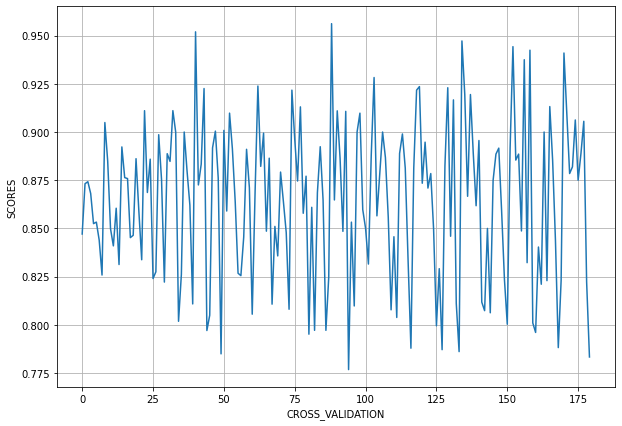

In [ ]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
clf = svm.SVC(random_state=42)

k=[]  #making list of scores
for i in range(5,20):
  p=cross_val_score(clf, X_train, Y_train, cv=i, scoring='recall_macro')
  k.extend(p)
  print("i =",i,p,'\n')
plt.figure(figsize=(10, 7))
l = np.arange(0, len(k), 1)
plt.plot(l,k)
plt.xlabel("CROSS_VALIDATION")
plt.ylabel("SCORES")
plt.grid(True)
plt.show()



**ROC CURVES**

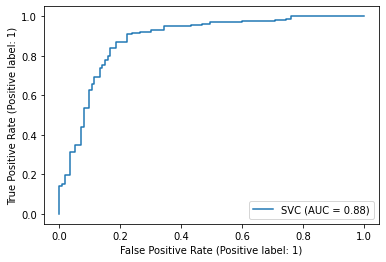

In [ ]:
from sklearn.metrics import RocCurveDisplay
clf.fit(X_train, Y_train) #clf=svm.SVC(random_state=42)
ax = plt.gca() #patplotlib axes with roc curve(get the current axes)
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, Y_test, ax=ax)


**GaussianProcessClassifier**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train, Y_train)
gpc.score(X_test, Y_test)

0.8369565217391305

**DecisionTreeClassifier**

i = 10 [0.77173913 0.83695652 0.75       0.83695652 0.85869565 0.7826087
 0.82608696 0.70652174 0.67032967 0.73626374] 

average score for i = 10 is 0.7776158623984711 

i = 11 [0.72619048 0.8452381  0.82142857 0.73809524 0.88095238 0.73493976
 0.79518072 0.85542169 0.74698795 0.6746988  0.60240964] 

average score for i = 11 is 0.7655948469201482 

i = 12 [0.75324675 0.80519481 0.83116883 0.72727273 0.8961039  0.76623377
 0.77631579 0.82894737 0.81578947 0.61842105 0.71052632 0.71052632] 

average score for i = 12 is 0.7699789245841878 

i = 13 [0.73239437 0.85915493 0.78873239 0.77464789 0.87323944 0.85915493
 0.70422535 0.83098592 0.82857143 0.72857143 0.71428571 0.68571429
 0.64285714] 

average score for i = 13 is 0.7709642470205849 

i = 14 [0.75757576 0.78787879 0.83333333 0.74242424 0.77272727 0.86363636
 0.74242424 0.84848485 0.8        0.81538462 0.67692308 0.72307692
 0.66153846 0.61538462] 

average score for i = 14 is 0.7600566100566098 

i = 15 [0.74193548 0.75806452 0.79

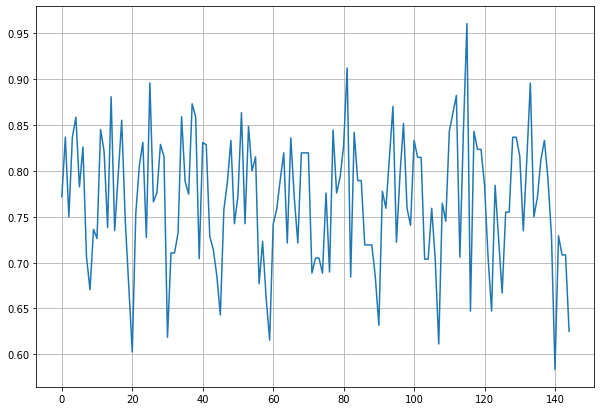

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)# random state controls randomness of estimator
n=[]
for i in  range(10,20):
  s=cross_val_score(dtc, data, Y, cv=i) #X
  n.extend(s)
  print("i =", i, s,'\n')
  print('average score for i =',i,'is' ,mean(s),'\n')
#for cv=16 we are getting highest score= 0.9122807
plt.figure(figsize=(10, 7))
l = np.arange(0, len(n), 1)
plt.plot(l,n)
plt.grid(True)
plt.show()